# udacity - SFND - Camera Based 2D Feature Tracking  

### Keypoints Detector evaluation

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tabulate import tabulate

In [3]:
## Importing report file.
df_detector_raw = pd.read_csv('210319_output/Detector_report.txt', sep=',',names=["Detector","image","keypoints","time","pc","nhs"])

In [4]:
## Ploting Dataframe to check convertion.
df_detector_raw.head(3)


,Detector,image,keypoints,time,pc,nhs
0,SHITOMASI,1,1370,45.5081,125,4.0
1,SHITOMASI,2,1301,21.3494,118,4.0
2,SHITOMASI,3,1361,18.7879,123,4.0


In [5]:
## Summary table considering the mean of keypoints and elapsedtime [ms]

detector_group = df_detector_raw.groupby("Detector")["keypoints", "time","pc","nhs"].mean()
detector_group["keypoints"] = detector_group["keypoints"].astype(int)
detector_group["pc"] = detector_group["pc"].astype(int)
detector_group["nhs"] = detector_group["nhs"].astype(int)

print(tabulate(detector_group, tablefmt="pipe", headers="keys",numalign="center"))

| Detector   |  keypoints  |  time   |  pc  |  nhs  |
|:-----------|:-----------:|:-------:|:----:|:-----:|
| AKAZE      |    1342     | 129.023 | 167  |   7   |
| BRISK      |    2711     | 48.5482 | 276  |  21   |
| FAST       |    1787     | 1.05449 | 149  |   7   |
| HARRIS     |     173     | 19.6915 |  24  |   6   |
| ORB        |     500     | 8.49676 | 116  |  56   |
| SHITOMASI  |    1342     | 21.8832 | 117  |   4   |
| SIFT       |    1386     | 179.739 | 138  |   5   |


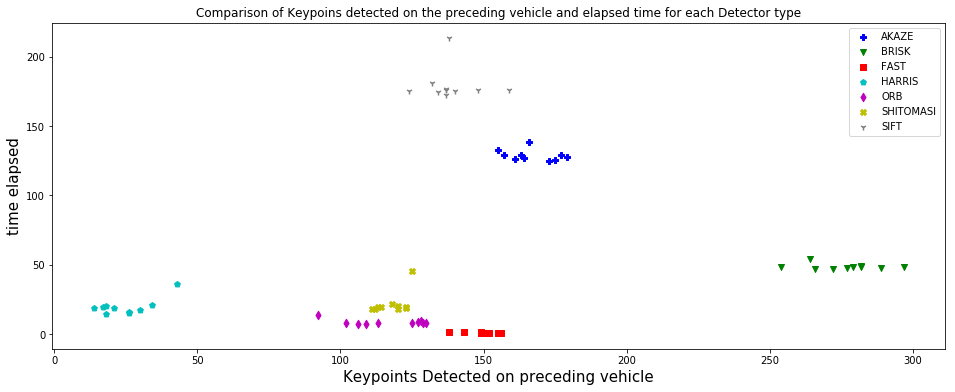

In [6]:
##Scatter Plotting to show the distribution points over all detectors types evaluated

fig, ax = plt.subplots(figsize=(16,6))
colors = ['b','g', 'r','c','m','y','grey']
markers = ['P','v', 's','p','d','X',"1"]
counter = 0
for key, grp in df_detector_raw.groupby(['Detector']):
    ax.scatter(grp["pc"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter += 1

ax.legend()
ax.set_xlabel('Keypoints Detected on preceding vehicle',fontsize=15)
ax.set_ylabel('time elapsed', fontsize=15)
ax.set_title('Comparison of Keypoins detected on the preceding vehicle and elapsed time for each Detector type')

plt.savefig('images/Detector_evaluation.png')
plt.show()

## Conclusion

The BRISK feature detect a higher number of the Keypoints in a short elapsed time. the FAST feature shows capable to be fast and detect a good number of keypoints comparing with the others features.